In [1]:
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as matplot

In [2]:
x, y = fetch_openml('mnist_784', version=1, return_X_y= True)
# norm
x = x / 255
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [3]:
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

model_and_params = {
    svm.SVC:   {
        "c":  [0.01, 0.1, 1, 10, 100, 500],
        "kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        "class_weight": 'balanced'
    }
}

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.01 0.9013


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.1 0.9008


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


1 0.4244


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


10 0.02949999999999997


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


100 0.025599999999999956


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


500 0.025399999999999978


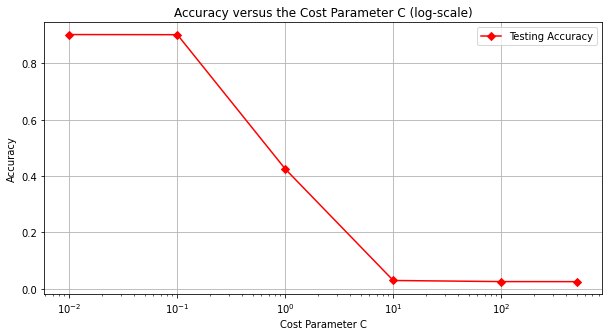

In [4]:
rbf_results = {}
for k, v in model_and_params.items():
    for c in model_and_params[k]["c"]:
        rbf_results.setdefault(c, {})
        mds = svm.SVC(C=c, kernel='poly', class_weight=model_and_params[k]["class_weight"], max_iter=1000, cache_size=10000)
        mds.fit(x_train, y_train)
        err = 1 - mds.score(x_test, y_test)
        print(c, err)
        rbf_results[c] = err

matplot.subplots(figsize=(10, 5))
matplot.semilogx(list(rbf_results.keys()), list(rbf_results.values()), '-gD', color='red', label="Testing Accuracy")
#matplot.semilogx(rbf_results.keys(), rbf_results.values(),'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.01 0.0595


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.1 0.17779999999999996


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


1 0.1936


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


10 0.1936


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


100 0.1936


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


500 0.1936


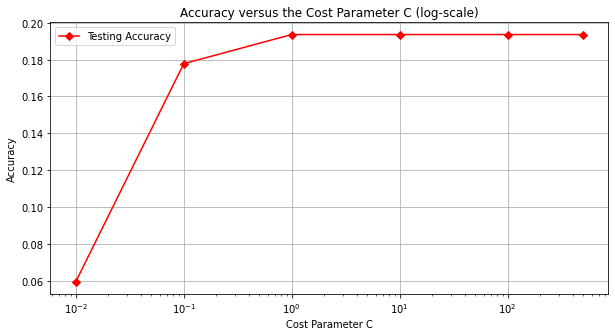

In [5]:
rbf_results = {}
for k, v in model_and_params.items():
    for c in model_and_params[k]["c"]:
        rbf_results.setdefault(c, {})
        mds = svm.SVC(C=c, kernel='linear', class_weight=model_and_params[k]["class_weight"], max_iter=1000, cache_size=10000)
        mds.fit(x_train, y_train)
        err = 1 - mds.score(x_test, y_test)
        print(c, err)
        rbf_results[c] = err
matplot.subplots(figsize=(10, 5))
matplot.semilogx(list(rbf_results.keys()), list(rbf_results.values()), '-gD', color='red', label="Testing Accuracy")
#matplot.semilogx(rbf_results.keys(), rbf_results.values(),'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.01 0.8144


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.1 0.31089999999999995


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


1 0.03510000000000002


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


10 0.02749999999999997


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


100 0.028200000000000003


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


500 0.028200000000000003


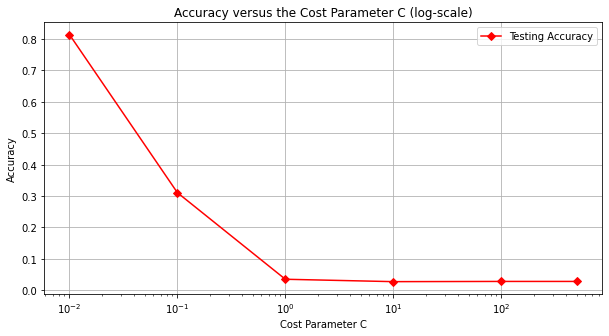

In [6]:
rbf_results = {}
for k, v in model_and_params.items():
    for c in model_and_params[k]["c"]:
        rbf_results.setdefault(c, {})
        mds = svm.SVC(C=c, kernel='rbf', class_weight=model_and_params[k]["class_weight"], max_iter=1000, cache_size=10000)
        mds.fit(x_train, y_train)
        err = 1 - mds.score(x_test, y_test)
        print(c, err)
        rbf_results[c] = err
matplot.subplots(figsize=(10, 5))
matplot.semilogx(list(rbf_results.keys()), list(rbf_results.values()), '-gD', color='red', label="Testing Accuracy")
#matplot.semilogx(rbf_results.keys(), rbf_results.values(),'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.01 0.8987


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.1 0.40390000000000004


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


1 0.12839999999999996


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


10 0.1371


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


100 0.14190000000000003


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


500 0.14090000000000003


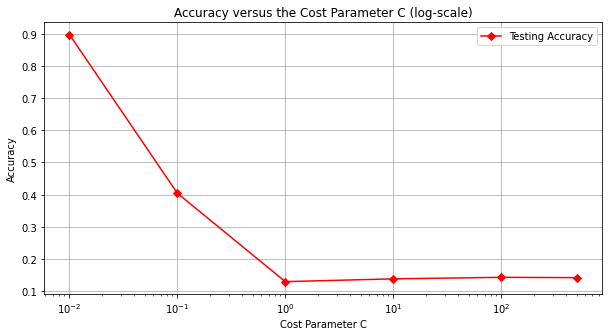

In [7]:
rbf_results = {}
for k, v in model_and_params.items():
    for c in model_and_params[k]["c"]:
        rbf_results.setdefault(c, {})
        mds = svm.SVC(C=c, kernel='sigmoid', class_weight=model_and_params[k]["class_weight"], max_iter=1000, cache_size=10000)
        mds.fit(x_train, y_train)
        err = 1 - mds.score(x_test, y_test)
        print(c, err)
        rbf_results[c] = err
matplot.subplots(figsize=(10, 5))
matplot.semilogx(list(rbf_results.keys()), list(rbf_results.values()), '-gD', color='red', label="Testing Accuracy")
#matplot.semilogx(rbf_results.keys(), rbf_results.values(),'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

In [5]:
# poly kernel showed promising results, so doing further analysis
mds = svm.SVC(C=1000, kernel='poly', max_iter=1000, cache_size=10000)
mds.fit(x_train, y_train)
print(1 - mds.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.025399999999999978


In [6]:
mds = svm.SVC(C=500, kernel='poly', degree=4, max_iter=1000, cache_size=10000)
mds.fit(x_train, y_train)
print(1 - mds.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.053100000000000036


In [7]:
mds = svm.SVC(C=1000, kernel='poly', max_iter=2000, cache_size=10000)
mds.fit(x_train, y_train)
print(1 - mds.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.022199999999999998
